## Machine Learning in Medicine and Biology - Homework 2

### Part B — Implementation (R or Python) 4pts

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1 Load data (delimiter = ',') 
df = pd.read_csv("/Users/ruiwushuang/Downloads/WineQT.csv", sep=',')

**B.1** Prepare X (add intercept); optionally standardize features.

In [ ]:
# y = last column "quality"; X = other columns without "Id"
y = df["quality"]
X_raw = df.drop(columns=["quality","Id"],axis=1)
X_scaled = StandardScaler().fit_transform(X_raw)
n = X_scaled.shape[0]
X = np.hstack([np.ones((n, 1)), X_scaled])

**B.2** Initialize β (zeros or small random).

In [ ]:
# B2: initialize beta
beta = np.zeros((X.shape[1], 1))

**B.3** For $T=2000$ iterations: $\hat{y}=X\beta$; $e=\hat{y}-y$; $g=\frac{1}{n}X^\top e$; $\beta \leftarrow \beta-\alpha g$; record $\mathcal{L}_t=\frac{1}{2n}\lVert e\rVert^2$.

In [ ]:
# Ensure y is an (n,1) column vector
y = df["quality"].to_numpy().reshape(-1, 1).astype(float)

# Define gradient descent function that records loss history
def record_lt(alpha=0.05, T=2000):
    beta = np.zeros((X.shape[1], 1))  # Initialize beta as all zeros
    losses = []  # To store loss at each iteration
    for _ in range(T):
        y_hat = X @ beta              # Compute predictions: ŷ = Xβ
        e = y_hat - y                 # Compute error: e = ŷ − y
        g = (X.T @ e) / n             # Compute gradient: g = (1/n) X^T e
        beta = beta - alpha * g       # Update parameters: β ← β − αg
        losses.append(float((e.T @ e) / (2 * n)))  # Record current loss
    return np.array(losses), beta     # Return loss curve and final beta

# Run the function once with default alpha=0.05
Lt = record_lt()
print(Lt)

(array([16.32545932, 14.74591947, 13.32180593, ...,  0.20299099,
        0.20299099,  0.20299099]), array([[ 5.65704287],
       [ 0.04026246],
       [-0.20273325],
       [-0.02593525],
       [ 0.0183505 ],
       [-0.08069526],
       [ 0.0242689 ],
       [-0.0912458 ],
       [-0.03369535],
       [-0.06385214],
       [ 0.14908244],
       [ 0.30296959]]))


/var/folders/zx/k9x664xn6x739hn3l8tcpvk80000gn/T/ipykernel_3149/2431425885.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float((e.T @ e) / (2 * n))) # Record L_t = (1/(2n))||e||^2


**B.4** Plot $L_t$ vs. iteration for several α; discuss convergence.

/var/folders/zx/k9x664xn6x739hn3l8tcpvk80000gn/T/ipykernel_3149/2431425885.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float((e.T @ e) / (2 * n))) # Record L_t = (1/(2n))||e||^2


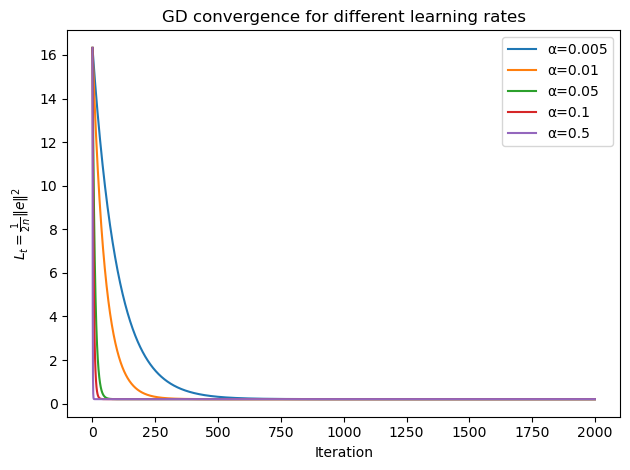

In [ ]:
# Define learning rates to test
alphas = [0.005, 0.01, 0.05, 0.1, 0.5] 
hist = {}

# Run gradient descent for each learning rate and store the loss curve
for a in alphas:
    L, _ = record_lt(a)   # L stores loss history; we ignore beta here
    hist[a] = L           # Save the loss curve for this alpha

# Plot loss over iterations for all learning rates
plt.figure()
for a, L in hist.items():
    plt.plot(L, label=f'α={a}')   # Plot each curve with its alpha label
plt.xlabel('Iteration')
plt.ylabel(r'$L_t=\frac{1}{2n}\|e\|^2$')  # Loss function
plt.title('GD convergence for different learning rates')
plt.legend()
plt.tight_layout()
plt.show()

**B.5** Compare $\beta_{\text{grad}}$ to $\beta_{\text{normal}} = (X^\top X)^{-1}X^\top y$ after your descent loop has run.  
Print $\lVert \beta_{\text{grad}} - \beta_{\text{normal}} \rVert_2$.

$$
\beta_{\text{grad}} = \beta \leftarrow \beta - \alpha \frac{1}{n} X^\top (X\beta - y)
$$

$$
\beta_{\text{normal}} = (X^\top X)^{-1}X^\top y
$$

This is comparing the analytical least squares solution of the gradient to the gradients derived by gradient descent.


In [ ]:
# Closed-form solution of the normal equation β_normal = (X^T X)^{-1} X^T y
beta_normal = np.linalg.pinv(X.T @ X) @ (X.T @ y)

# Print the distance between the two and the corresponding loss
print("alpha\tfinal_L\t\tL(beta_grad)\tL(beta_normal)\t||β_grad-β_normal||_2")
for a in alphas:
    L, beta_grad = record_lt(alpha=a, T=2000)
    diff = np.linalg.norm(beta_grad - beta_normal)
    loss_grad = float(((X @ beta_grad - y).T @ (X @ beta_grad - y)) / (2 * n))
    loss_ne = float(((X @ beta_normal - y).T @ (X @ beta_normal - y)) / (2 * n)) 
    print(f"{a:.3f}\t{L[-1]:.6f}\t{loss_grad:.6f}\t{loss_ne:.6f}\t{diff:.6f}")

alpha	final_L		L(beta_grad)	L(beta_normal)	||β_grad-β_normal||_2


/var/folders/zx/k9x664xn6x739hn3l8tcpvk80000gn/T/ipykernel_3149/2431425885.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float((e.T @ e) / (2 * n))) # Record L_t = (1/(2n))||e||^2
/var/folders/zx/k9x664xn6x739hn3l8tcpvk80000gn/T/ipykernel_3149/2738472737.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_grad = float(((X @ beta_grad - y).T @ (X @ beta_grad - y)) / (2 * n))
/var/folders/zx/k9x664xn6x739hn3l8tcpvk80000gn/T/ipykernel_3149/2738472737.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array

0.005	0.203072	0.203072	0.202991	0.044414
0.010	0.203006	0.203006	0.202991	0.022554
0.050	0.202991	0.202991	0.202991	0.000206
0.100	0.202991	0.202991	0.202991	0.000001
0.500	0.202991	0.202991	0.202991	0.000000


As shown in the table, the gradient descent solution $ \beta_{\text{grad}} $ closely matches the closed-form solution $ \beta_{\text{normal}} $ when a suitable learning rate (e.g., $ \alpha = 0.1 $) is chosen. The L2 distance between the two is less than $ 0.000001 $, and the final losses are nearly identical.